In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")

In [17]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [18]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
df.shape

(1599, 12)

In [20]:
def detail_info():
    temp_df = pd.DataFrame(index= df.columns)
    
    temp_df['data_type'] = df.dtypes
    temp_df['unique_val'] = df.nunique()
    temp_df['missing_val'] = df.isnull().sum()
    temp_df['missing_val_%'] = round(df.isnull().mean()*100,2)
    
    return temp_df

In [21]:
detail_info()

,data_type,unique_val,missing_val,missing_val_%
fixed acidity,float64,96,0,0.0
volatile acidity,float64,143,0,0.0
citric acid,float64,80,0,0.0
residual sugar,float64,91,0,0.0
chlorides,float64,153,0,0.0
free sulfur dioxide,float64,60,0,0.0
total sulfur dioxide,float64,144,0,0.0
density,float64,436,0,0.0
pH,float64,89,0,0.0
sulphates,float64,96,0,0.0


In [22]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [23]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [24]:
group1 = df.groupby(['quality']).agg({'quality':['count']})

cm = sns.dark_palette("red", as_cmap=True)
group1.style.background_gradient(cmap=cm)

,quality
,count
quality,
3,10
4,53
5,681
6,638
7,199
8,18


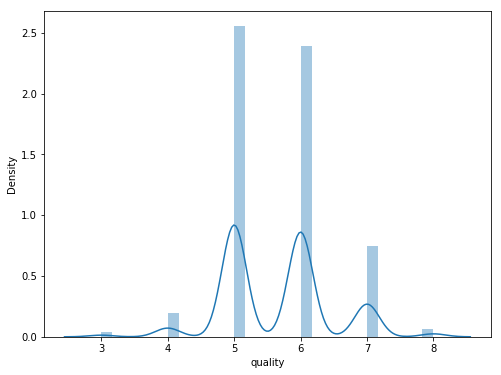

In [25]:
plt.figure(figsize=(8,6))
sns.distplot(df['quality'])

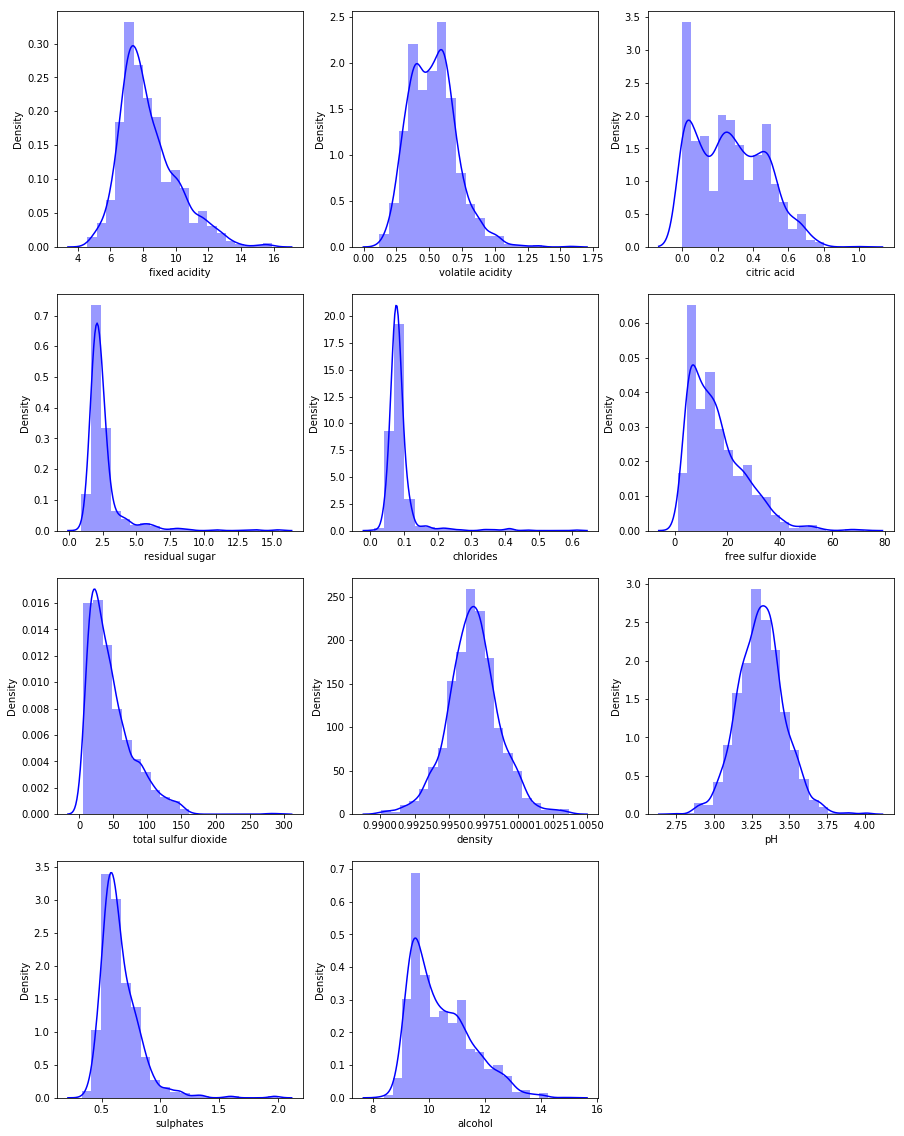

In [26]:
plt.figure(figsize=(15,20))
for enum, feature in enumerate(df.columns):
    if feature != 'quality':        
        plt.subplot(4, 3, enum+1)
        sns.distplot(df[feature], color='b', bins =20)
        plt.xlabel(feature)
        plt.show

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


##### Residual sugar is right skewed and has outliers
##### Free sulfur dioxide is right skewed and has outliers
##### total sulfur dioxide is right skewed and has outliers


In [28]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.33, random_state=123)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [31]:
X_train = scaler.fit_transform(X_train)

In [32]:
scaler.mean_

array([ 8.35742297,  0.52066293,  0.27380952,  2.54640523,  0.08764893,
       16.35060691, 47.23529412,  0.99677514,  3.30671335,  0.66143791,
       10.4052132 ])

In [33]:
X_test = scaler.transform(X_test)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [35]:
metrics = pd.DataFrame(index=['Train_Accuracy', 'Test_Accuracy',
                              'Train_Accuracy_CV', 'Test_Accuracy_CV',
                              'Train_Accuracy_Optimized', 'Test_Accuracy_Optimized'],
                       columns=['LogisticReg','SVClassifier', 'KNeighbors','DecisionTree', 'RandomForest',])

In [36]:
metrics

,LogisticReg,SVClassifier,KNeighbors,DecisionTree,RandomForest
Train_Accuracy,NaN,NaN,NaN,NaN,NaN
Test_Accuracy,NaN,NaN,NaN,NaN,NaN
Train_Accuracy_CV,NaN,NaN,NaN,NaN,NaN
Test_Accuracy_CV,NaN,NaN,NaN,NaN,NaN
Train_Accuracy_Optimized,NaN,NaN,NaN,NaN,NaN
Test_Accuracy_Optimized,NaN,NaN,NaN,NaN,NaN


In [37]:
models = []

models.append(('LogisticReg',LogisticRegression()))
models.append(('SVClassifier',SVC()))
models.append(('KNeighbors',KNeighborsClassifier()))
models.append(('DecisionTree',DecisionTreeClassifier()))
models.append(('RandomForest',RandomForestClassifier()))

In [38]:
for name, model in models:
    model.fit(X_train, y_train)
    result = model.score(X_train, y_train)
    metrics.loc['Train_Accuracy', name] = round(result*100,2)
  
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics.loc['Test_Accuracy', name] = round(accuracy_score(y_test,y_pred)*100,2)


    cv_result = cross_val_score(model, X_train, y_train, cv = 5, scoring ='accuracy')
    print(f"{name:{13}} {cv_result} {cv_result.mean():{18}} {cv_result.std():{18}}")
    metrics.loc['Train_Accuracy_CV', name] = round(cv_result.mean()*100,2)
    
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics.loc['Test_Accuracy_CV', name] = round(accuracy_score(y_test,y_pred)*100,2)
    

LogisticReg   [0.57209302 0.58411215 0.63084112 0.64953271 0.60280374] 0.6078765485763965 0.028752558729453204
SVClassifier  [0.59069767 0.64018692 0.63084112 0.64018692 0.60280374] 0.6209432732014779 0.020408047138625908
KNeighbors    [0.56744186 0.64018692 0.53271028 0.55607477 0.51401869] 0.5620865029341447 0.04321567371675555
DecisionTree  [0.54418605 0.62149533 0.59813084 0.57009346 0.5       ] 0.5667811345359703 0.042326531609233164
RandomForest  [0.68372093 0.69626168 0.67757009 0.6682243  0.63551402] 0.6722582047381004 0.02050455936155569


In [39]:
metrics

,LogisticReg,SVClassifier,KNeighbors,DecisionTree,RandomForest
Train_Accuracy,61.9,67.88,69.93,100,100
Test_Accuracy,57.2,60.61,56.25,57.77,69.13
Train_Accuracy_CV,60.79,62.09,56.21,56.68,67.23
Test_Accuracy_CV,57.2,60.61,56.25,57.39,66.86
Train_Accuracy_Optimized,NaN,NaN,NaN,NaN,NaN
Test_Accuracy_Optimized,NaN,NaN,NaN,NaN,NaN


# Hyperparameter Tunning

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
# Logistic Regression:

param_grid = {'solver' : ['liblinear', 'saga',], 
              'penalty': ['l1', 'l2', 'elasticnet'], 
              'C': np.arange(.1,1,.1),
              'n_jobs': [-1]
             }

lr_model = GridSearchCV(LogisticRegression(), param_grid, cv =5, scoring='accuracy')
lr_model.fit(X_train,y_train)
lr_model.best_params_

{'C': 0.5, 'n_jobs': -1, 'penalty': 'l1', 'solver': 'saga'}

In [42]:
#best_params_
#{'C': 0.5, 'n_jobs': -1, 'penalty': 'l1', 'solver': 'saga'}

In [43]:
lr_model = LogisticRegression(C= 0.5, penalty= 'l1', solver= 'saga', n_jobs= -1)
lr_model.fit(X_train,y_train)
y_pred_lr = lr_model.predict(X_test)
accuracy_score(y_pred_lr,y_test)

0.5700757575757576

In [44]:
 metrics.loc['Train_Accuracy_Optimized', 'LogisticReg'] = round(lr_model.score(X_train, y_train)*100,2)
 metrics.loc['Test_Accuracy_Optimized' , 'LogisticReg'] = round(accuracy_score(y_pred_lr,y_test)*100,2)

In [45]:
metrics

,LogisticReg,SVClassifier,KNeighbors,DecisionTree,RandomForest
Train_Accuracy,61.9,67.88,69.93,100,100
Test_Accuracy,57.2,60.61,56.25,57.77,69.13
Train_Accuracy_CV,60.79,62.09,56.21,56.68,67.23
Test_Accuracy_CV,57.2,60.61,56.25,57.39,66.86
Train_Accuracy_Optimized,62,NaN,NaN,NaN,NaN
Test_Accuracy_Optimized,57.01,NaN,NaN,NaN,NaN


In [47]:
#SVC:
param_grid = {'C': [1,10], 
              'gamma': [1,0.1],
              'kernel': ['linear','rbf'],
              'random_state' : [42],
             } 



#               'kernel': ['linear','poly', 'rbf', 'sigmoid'],

svc_model = GridSearchCV(SVC(), param_grid, cv =3, scoring='accuracy')
svc_model.fit(X_train,y_train)
svc_model.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 42}

In [48]:
#best_params_
#{'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 42}

In [49]:
svc_model = SVC(C= 1, gamma= 0.1, kernel= 'rbf', random_state= 42)
svc_model.fit(X_train,y_train)
y_pred_svc = svc_model.predict(X_test)
accuracy_score(y_pred_svc, y_test)

0.615530303030303

In [50]:
 metrics.loc['Train_Accuracy_Optimized', 'SVClassifier'] = round(svc_model.score(X_train,  y_train)*100,2)
 metrics.loc['Test_Accuracy_Optimized' , 'SVClassifier'] = round(accuracy_score(y_pred_svc, y_test)*100,2)

In [51]:
metrics

,LogisticReg,SVClassifier,KNeighbors,DecisionTree,RandomForest
Train_Accuracy,61.9,67.88,69.93,100,100
Test_Accuracy,57.2,60.61,56.25,57.77,69.13
Train_Accuracy_CV,60.79,62.09,56.21,56.68,67.23
Test_Accuracy_CV,57.2,60.61,56.25,57.39,66.86
Train_Accuracy_Optimized,62,68.07,NaN,NaN,NaN
Test_Accuracy_Optimized,57.01,61.55,NaN,NaN,NaN


In [52]:
# KNeighbor

param_grid = {'n_neighbors': np.arange(2,25,1),
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [10,20,30],
              'metric': ['minkowski'],
              'n_jobs' : [-1]
                }


kn_model = GridSearchCV(KNeighborsClassifier(), param_grid, cv =3, scoring='accuracy')
kn_model.fit(X_train,y_train)
kn_model.best_params_


{'algorithm': 'auto',
 'leaf_size': 10,
 'metric': 'minkowski',
 'n_jobs': -1,
 'n_neighbors': 22}

In [53]:
# best_params_
# n_neighbors= 22, algorithm= 'auto', leaf_size= 10, metric= 'minkowski', n_jobs = -1

In [54]:
kn_model = KNeighborsClassifier(n_neighbors= 22, algorithm= 'auto', leaf_size= 10, metric= 'minkowski', n_jobs = -1)
kn_model.fit(X_train,y_train)
y_pred_kn = kn_model.predict(X_test)
accuracy_score(y_pred_kn, y_test)

0.5909090909090909

In [55]:
 metrics.loc['Train_Accuracy_Optimized', 'KNeighbors'] = round(kn_model.score(X_train,  y_train)*100,2)
 metrics.loc['Test_Accuracy_Optimized' , 'KNeighbors'] = round(accuracy_score(y_pred_kn, y_test)*100,2)

In [56]:
metrics

,LogisticReg,SVClassifier,KNeighbors,DecisionTree,RandomForest
Train_Accuracy,61.9,67.88,69.93,100,100
Test_Accuracy,57.2,60.61,56.25,57.77,69.13
Train_Accuracy_CV,60.79,62.09,56.21,56.68,67.23
Test_Accuracy_CV,57.2,60.61,56.25,57.39,66.86
Train_Accuracy_Optimized,62,68.07,61.06,NaN,NaN
Test_Accuracy_Optimized,57.01,61.55,59.09,NaN,NaN


In [133]:
# Decision Tree

param_grid = {'criterion' : ['gini', 'entropy', 'log_loss'],
              'splitter': ['best', 'random'],
              'max_depth' : [2,4,6,8,10],
              'min_samples_leaf': np.arange(1,10,1),
              'max_features' : ['auto', 'sqrt'],
              'random_state' : [42]
             } 


dt_model = GridSearchCV(DecisionTreeClassifier(), param_grid, cv =5, scoring='accuracy')
dt_model.fit(X_train,y_train)
dt_model.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'random_state': 42,
 'splitter': 'best'}

In [57]:
# best_params_
'''
{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'random_state': 42,
 'splitter': 'best'}
 
'''

"\n{'criterion': 'gini',\n 'max_depth': 10,\n 'max_features': 'auto',\n 'min_samples_leaf': 5,\n 'random_state': 42,\n 'splitter': 'best'}\n \n"

In [58]:
dt_model = DecisionTreeClassifier(criterion= 'gini', max_depth= 10, max_features= 'auto', min_samples_leaf= 5, splitter = 'best', random_state=42)
dt_model.fit(X_train,y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_score(y_pred_dt, y_test)

0.5303030303030303

In [59]:
 metrics.loc['Train_Accuracy_Optimized', 'DecisionTree'] = round(dt_model.score(X_train,  y_train)*100,2)
 metrics.loc['Test_Accuracy_Optimized' , 'DecisionTree'] = round(accuracy_score(y_pred_dt, y_test)*100,2)

In [60]:
 metrics

,LogisticReg,SVClassifier,KNeighbors,DecisionTree,RandomForest
Train_Accuracy,61.9,67.88,69.93,100,100
Test_Accuracy,57.2,60.61,56.25,57.77,69.13
Train_Accuracy_CV,60.79,62.09,56.21,56.68,67.23
Test_Accuracy_CV,57.2,60.61,56.25,57.39,66.86
Train_Accuracy_Optimized,62,68.07,61.06,75.54,NaN
Test_Accuracy_Optimized,57.01,61.55,59.09,53.03,NaN


In [160]:
# Random Forest

param_grid = {'criterion' : ['gini', 'entropy'],
        'n_estimators' : [10,100],
        'max_depth' : [5,6,7,8,9,10],
        'max_features':  [5,6,7,8,9,10],
        'max_leaf_nodes': [5,6,7,8,9,10],
        'n_jobs': [-1]
        }

rf_model = GridSearchCV(RandomForestClassifier(), param_grid, scoring='accuracy')
rf_model.fit(X_train,y_train)
rf_model.best_params_

      

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 5,
 'max_leaf_nodes': 10,
 'n_estimators': 100,
 'n_jobs': -1}

In [162]:
rf_model.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 5,
 'max_leaf_nodes': 10,
 'n_estimators': 100,
 'n_jobs': -1}

In [62]:
# best_params_
'''
{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 5,
 'max_leaf_nodes': 10,
 'n_estimators': 100,
 'n_jobs': -1}

'''

"\n{'criterion': 'gini',\n 'max_depth': 5,\n 'max_features': 5,\n 'max_leaf_nodes': 10,\n 'n_estimators': 100,\n 'n_jobs': -1}\n\n"

In [63]:
rf_model = RandomForestClassifier(criterion= 'gini', n_estimators= 100, max_depth= 5, max_features= 5, max_leaf_nodes= 10)
rf_model.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_score(y_pred_rf, y_test)

0.5700757575757576

In [64]:
 metrics.loc['Train_Accuracy_Optimized', 'RandomForest'] = round(rf_model.score(X_train,  y_train)*100,2)
 metrics.loc['Test_Accuracy_Optimized' , 'RandomForest'] = round(accuracy_score(y_pred_rf, y_test)*100,2)

In [65]:
metrics

,LogisticReg,SVClassifier,KNeighbors,DecisionTree,RandomForest
Train_Accuracy,61.9,67.88,69.93,100,100
Test_Accuracy,57.2,60.61,56.25,57.77,69.13
Train_Accuracy_CV,60.79,62.09,56.21,56.68,67.23
Test_Accuracy_CV,57.2,60.61,56.25,57.39,66.86
Train_Accuracy_Optimized,62,68.07,61.06,75.54,64.15
Test_Accuracy_Optimized,57.01,61.55,59.09,53.03,57.01


In [66]:
metrics.T

,Train_Accuracy,Test_Accuracy,Train_Accuracy_CV,Test_Accuracy_CV,Train_Accuracy_Optimized,Test_Accuracy_Optimized
LogisticReg,61.9,57.2,60.79,57.2,62,57.01
SVClassifier,67.88,60.61,62.09,60.61,68.07,61.55
KNeighbors,69.93,56.25,56.21,56.25,61.06,59.09
DecisionTree,100,57.77,56.68,57.39,75.54,53.03
RandomForest,100,69.13,67.23,66.86,64.15,57.01


#### As per the above metrics table:
Deision Tree has the maximum training acuracy 75.54% but has low test accuracy as 53.03%, seems to be overfitted.

SVC has second highest training acuracy 68.07% with test accuracy as 61.55% (highest in test accuracy) which seems to be stable model for prediction.

In [68]:
import pickle
pickle.dump(scaler, open('Red_Wine_Quality_scaler.pkl','wb'))
pickle.dump(model, open('Red_Wine_Quality_SVC.pkl','wb'))